<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/homework_2/hw2_problem1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/Housing.csv'
df = pd.read_csv(file_path)

from IPython.display import display
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
varlist =  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df = df[varlist]
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [4]:
# with scaler everything works fine. - without, runtime error

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#df[num_vars] = scaler.fit_transform(df[num_vars])
#df.head()

In [5]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_val = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [6]:
y_train = df_train.pop('price') # seperate x from y
y_val = df_val.pop('price')

y_train = y_train.to_numpy() # convert to numpy array for matrix multiplication
y_val = y_val.to_numpy()


x_train = df_train.to_numpy()
x_val = df_val.to_numpy()



X_0 = np.ones((len(y_train), 1)) # put together input vector
x_train = np.hstack((X_0, x_train))

tmp = np.ones((len(x_val), 1))
x_val = np.hstack((tmp, x_val))

x_train[:10]

array([[1.000e+00, 8.050e+03, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 6.360e+03, 3.000e+00, 2.000e+00, 4.000e+00, 0.000e+00],
       [1.000e+00, 6.750e+03, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00],
       [1.000e+00, 6.420e+03, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 3.630e+03, 4.000e+00, 1.000e+00, 2.000e+00, 3.000e+00],
       [1.000e+00, 3.850e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 8.960e+03, 4.000e+00, 4.000e+00, 4.000e+00, 3.000e+00],
       [1.000e+00, 8.250e+03, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 3.000e+03, 3.000e+00, 2.000e+00, 2.000e+00, 0.000e+00],
       [1.000e+00, 4.032e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00]])

In [7]:
#initalize theta
theta = np.zeros(x_train.shape[1])
#theta = np.random.randn(1,6)
theta

array([0., 0., 0., 0., 0., 0.])

In [8]:
def compute_loss(X, y, theta):

    m = len(y)

    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [12]:
def gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, iterations):

    m = len(y_train)  # Number of training examples
    training_loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)


    for i in range(iterations):

        predictions = x_train.dot(theta)
        error = np.subtract(predictions, y_train)

        tmp = x_train.transpose().dot(error)


        sum_delta = (alpha / m) * tmp

        #print(sum_delta)

        theta = theta - sum_delta

        training_loss_history[i] = compute_loss(x_train, y_train, theta)
        validation_loss_history[i] = compute_loss(x_val, y_val, theta)


    return theta, training_loss_history, validation_loss_history

In [15]:
#run gradient decent

theta = [0., 0., 0., 0., 0., 0.] #initialize
iterations = 2000
alpha = 0.0000000001

theta, training_loss_history, validation_loss_history = gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, iterations)
print('Final value of theta =', theta)
print('training_loss_history =', training_loss_history[:5], '...')
print('validation_loss_history =', validation_loss_history[:5], '...')

Final value of theta = [1.72393579e-01 8.23623270e+02 5.42677319e-01 2.60942013e-01
 3.73527766e-01 1.44534717e-01]
training_loss_history = [1.31670995e+13 1.30958443e+13 1.30250315e+13 1.29546583e+13
 1.28847221e+13] ...
validation_loss_history = [1.25086870e+13 1.24384388e+13 1.23686347e+13 1.22992720e+13
 1.22303479e+13] ...


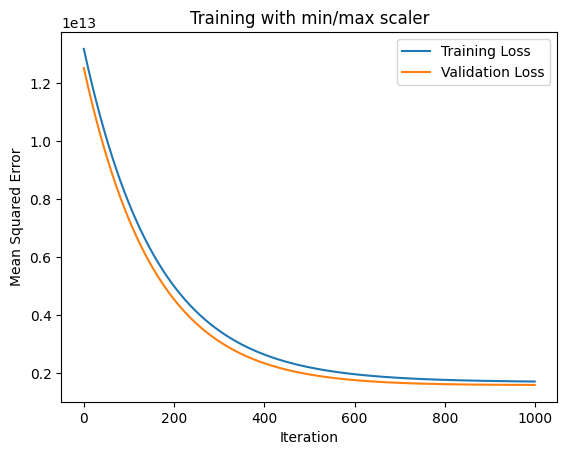

In [16]:
# Plot the training and validation loss after each iteration
plt.plot(training_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training with min/max scaler")
plt.show()